In [1]:
#non quantized model

# from vllm import LLM,SamplingParams
# llm = LLM(path_model,max_model_len=1024)

# sampling_params = SamplingParams(
#             temperature=0.7,
#             top_p=1,
#             max_tokens=512,
#             presence_penalty=1.15,
#         )

# to try prompt

## airoboros filtering
https://github.com/jondurbin/airoboros/blob/main/airoboros/instructors/prompts/filter.txt

In [50]:
airoboros = """Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response.

Details to pay attention to:
- did the response follow the instruction precisely?
- was the response correct?
- is the code complete and accurate, and does it provide the exact functionality requested?
- was the response written in an intelligent, interesting way?

With those details in mind, please silently rank the response with a score between 0 and 100, with 100 being the best.

If the response included any sort of warning or disclaimer, or it was a refusal to answer, be sure to give it a score of 0.

If the response indicates in any way that it was written by an AI assistant, or indicates it doesn't have opinions, senses, emotions, etc., give it a score of 0.

If the score is {threshold} or above, output a single word "GOOD", otherwise output a single word "BAD"

INSTRUCTION:
{instruction}

RESPONSE:
{response}
"""



## teknium/carper 
https://x.com/Teknium1/status/1748041953567215709?s=20

In [13]:
"""Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response.

Details to pay attention to:
- did the response follow the instruction precisely?
- was the 
- is the code complete and accurate, and does it provide the exact functionality requested?
- was the function g interse?

"""
"""
Not educational, Somewhat Educational, Highly Educational"""

'\nNot educational, Somewhat Educational, Highly Educational'

In [14]:
"""
Not educational, Somewhat Educational, Highly Educational"""

'\nNot educational, Somewhat Educational, Highly Educational'

# init 

In [1]:
%load_ext autoreload
%autoreload 2

from utils_test_puzzle import prompt_instruction#,puzzle_dict
import matplotlib.pyplot as plt
import numpy as np
import torch
from compute_rank import Auto_j_Rank,Yes_model,OpenCodeInterpreter_1,OpenCodeInterpreter_2
import pandas as pd
import math
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from key import OPENAI_API_KEY
import json
    # left puzzle tested against top puzzle

In [2]:
path_imgp = "/home/flowers/work/OpenELM/analysis_P3/quality/to_analyse/maps_1_imgep_smart.json"
path_elm = "/home/flowers/work/OpenELM/analysis_P3/quality/to_analyse/maps_1_elm_NLP.json"
path_rd_gen = "/home/flowers/work/OpenELM/analysis_P3/quality/to_analyse/maps_1_rd_gen.json"
list_path=[path_imgp,path_elm,path_rd_gen]
path = path_imgp
with open(path, "r") as file:
    data = json.load(file)

np.random.seed(0)

def format_puzzle(data_point):
    puzzle = data_point["program_str"]
    description = data_point["description"]
    for _ in range(3): 
        if isinstance(description, list):
            description = description[0]
        if isinstance(description, str):
            break
    format = description +"\n```python\n"+puzzle+"\n```"
    return format
idx = np.random.choice(len(data), 65, replace=False)
print(idx)
puzzle_aces={f"puzz_{i}":format_puzzle(data[i]) for i in idx}

puzzle_dict = puzzle_aces
dic_int_res={}

[ 55 852  14 553 141 270 636 529 681 312  31 524 499 306 766 418 395 310
 950 479 566 787 919 901 261 427 215 382 320 800 698 911 656 531 829 299
  97 548 601 416 142 440 949 614 685 627 953 240 841 811 960 935 906 351
 252 262 122 956 145 425 317 366 603 214 330]


In [3]:
for key,values in puzzle_aces.items():
    print(values)

The puzzle requires finding the starting index of a subsequence in a given sequence such that the sum of the subsequence is greater than or equal to a specified lower bound.
```python
def f(start: int, k=3, lower=150, seq=[3, 1, 2, 65, 18, 91, -30, 100, 0, 19, 52]) -> bool:
    return 0 <= start <= len(seq) - k and sum(seq[start:start + k]) >= lower
def g(k = 3, lower = 150, seq = [3, 1, 2, 65, 18, 91, -30, 100, 0, 19, 52]):
    return max(range(len(seq) - k + 1), key=lambda start: sum(seq[start:start + k]))
assert f(g()) == True
```
The puzzle involves defining a function to calculate the factorial of a number and checking if the factorial of 5 is equal to 120.
```python

def f(factorial: int) -> bool:
    return factorial == 120

def g(number=5) -> int:
    if number == 0:
        return 1
    else:
        return number * g(number - 1)

assert f(g()) == True

```
The puzzle requires the student to implement a function f that takes a list of integers and returns a boolean value based

## utils

In [3]:
def plot_pairwise_comparison_results(save_results):
    # Create an empty grid dataframe
    grid = pd.DataFrame(index=puzzle_dict.keys(), columns=puzzle_dict.keys())
    # Fill the grid with pairwise comparison results
    for key1, key2, res_pairwise in save_results:
        if math.isnan(grid.loc[key1, key2]):
            grid.loc[key1, key2] = 0
        if math.isnan(grid.loc[key2, key1]):
            grid.loc[key2, key1] = 0
        if res_pairwise == 0:
            grid.loc[key1, key2] += 1#'Win'
            grid.loc[key2, key1] += 0#'Loss'
        elif res_pairwise == 1:
            grid.loc[key1, key2] += 0#'Loss'
            grid.loc[key2, key1] += 1#'Win'
        elif res_pairwise == 2:
            grid.loc[key1, key2] += 0.5#'Draw'
            grid.loc[key2, key1] += 0.5#'Draw'

    order=grid.sum().sort_values(ascending=True).index
    grid_order=grid.loc[order, order]
    grid_order=grid_order.to_numpy()
    grid_order= np.nan_to_num(grid_order)
    grid_order = np.array(grid_order, dtype=float)
    plt.imshow(grid_order, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Pairwise comparison results')
    plt.xlabel('Puzzle index')
    plt.ylabel('Puzzle index')
    # plot keys
    plt.xticks(np.arange(len(order)), order, rotation=60, ha='right')
    plt.yticks(np.arange(len(order)), order)
    for i in range(len(order)):
        for j in range(len(order)):
            plt.annotate(str(grid_order[i, j]), xy=(j, i), ha='center', va='center', color='white')

    plt.show()

## Auto-J

### Pairwise

In [5]:
puzzle_dict = puzzle_aces
Rank=Auto_j_Rank(puzzle_dict,mode_rank="pairwise",prompt_instruction=prompt_instruction,n_generation=1)
ranked_puzzles, win_record = Rank.computing_ranking()
speed_llama2 = Rank.list_speed_inference
save_results = Rank.save_results
save_results_inverse = Rank.save_results_inverse
print(torch.mean(torch.tensor(speed_llama2)))

You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute and has already quantized weights. However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
Speed Inference: 105.61523410073684 tok/s:   1%|          | 11/1770 [05:01<13:22:46, 27.38s/it]


KeyboardInterrupt: 

In [20]:
save_all_res = Rank.save_all_results

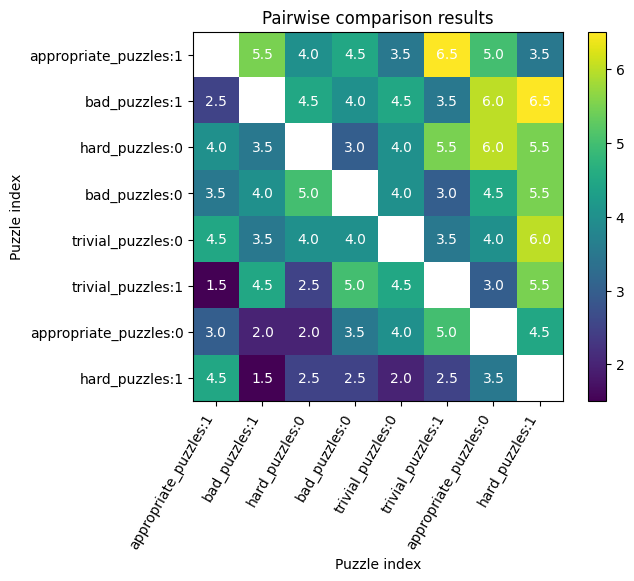

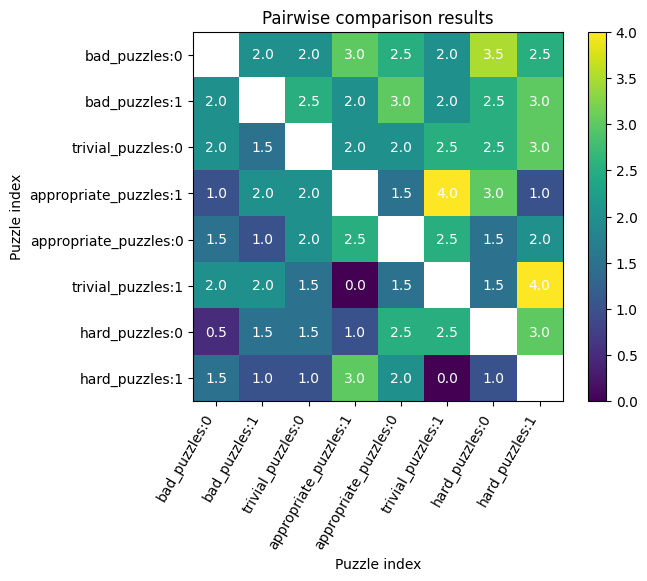

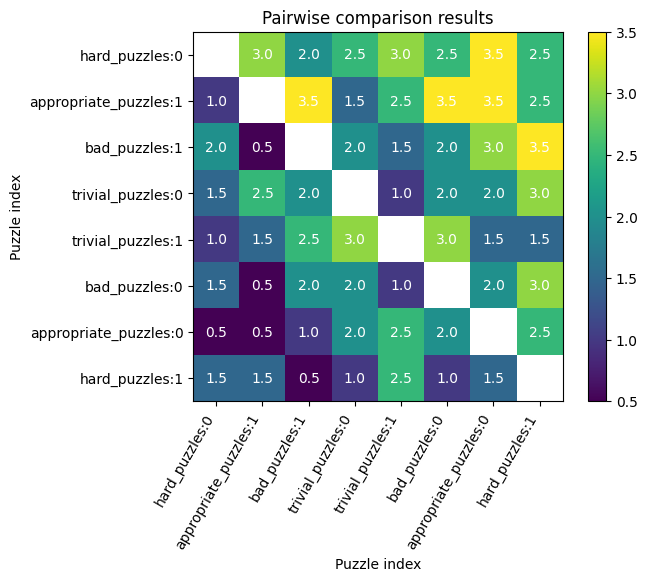

In [21]:
plot_pairwise_comparison_results(save_all_res) 
plot_pairwise_comparison_results(save_results)
plot_pairwise_comparison_results(save_results_inverse) # test position bias in the pairwise comparison

### absolute

In [5]:
Rank=Auto_j_Rank(puzzle_dict,mode_rank="absolute",prompt_instruction=prompt_instruction,exllama2=True,n_generation=1)
ranked_keys, grades = Rank.computing_ranking()

You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute and has already quantized weights. However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
Speed Inference: 76.93975006778456 tok/s:   2%|▏         | 6/400 [01:53<2:04:45, 19.00s/it]


KeyboardInterrupt: 

In [3]:
sorted(grades, key=grades.get, reverse=True)

['appropriate_puzzles:0',
 'appropriate_puzzles:1',
 'hard_puzzles:0',
 'bad_puzzles:1',
 'hard_puzzles:1',
 'trivial_puzzles:1',
 'trivial_puzzles:0',
 'bad_puzzles:0']

In [4]:
grades

{'bad_puzzles:0': [2.0, 3.0, 3.0, 2.0],
 'bad_puzzles:1': [3.0, 3.0, 2.0, 3.0],
 'trivial_puzzles:0': [2.0, 3.0, 3.0, 3.0],
 'trivial_puzzles:1': [3.0, 2.0, 3.0, 3.0],
 'appropriate_puzzles:0': [3.0, 3.0, 3.0, 3.0],
 'appropriate_puzzles:1': [3.0, 3.0, 3.0, 3.0],
 'hard_puzzles:0': [3.0, 3.0, 3.0, 3.0],
 'hard_puzzles:1': [3.0, 3.0, 2.0, 3.0]}

# YES model (absolute)


In [4]:
path_model ="/home/flowers/work/hf/deepseek-coder-1.3b-instruct"
yes_mode_list= ["finetuning","education"]
yes = Yes_model(puzzle_dict,model_id=path_model,yes_mode="education",exllama2=False)
ranked_keys, grades = yes.absolute_ranking()
sorted_grades=sorted(grades, key=grades.get, reverse=True)
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles
dic_int_res["yes_educ"]=grades_puzzles
# prompt finetuning
yes.yes_mode="finetuning" 
ranked_keys, grades = yes.absolute_ranking()
sorted_grades=sorted(grades, key=grades.get, reverse=True)
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles
dic_int_res["yes_fine"]=grades_puzzles

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/flowers/miniconda3/envs/inference/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Speed Inference: 3634.5722709073566 tok/s: 100%|██████████| 65/65 [00:05<00:00, 11.29it/s]


In [37]:
path_model_7b = "/home/flowers/work/hf/deepseek-coder-6.7B-base-GPTQ"
yes_mode_list= ["finetuning","education"]
yes = Yes_model(puzzle_dict,model_id=path_model_7b,yes_mode="education",exllama2=True)
ranked_keys, grades = yes.absolute_ranking()
sorted_grades=sorted(grades, key=grades.get, reverse=True)
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles
dic_int_res["yes_educ_7b"]=grades_puzzles
# prompt finetuning
yes.yes_mode="finetuning" 
ranked_keys, grades = yes.absolute_ranking()
sorted_grades=sorted(grades, key=grades.get, reverse=True)
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles
dic_int_res["yes_fine_7b"]=grades_puzzles


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute and has already quantized weights. However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
Speed Inference: 2646.378539615826 tok/s: 100%|██████████| 65/65 [00:06<00:00,  9.29it/s] 


# OpenCodeInterpreter

In [7]:
code_interp_1=OpenCodeInterpreter_1(OPENAI_API_KEY,puzzle_dict,mode_rank="absolute",prompt_instruction=None,model_id="gpt-3.5-turbo-0125",n_generation=1,temperature=0)
ranked_keys, grades = code_interp_1.absolute_ranking()
ranked_keys
#['hard_puzzles:0',
#  'hard_puzzles:1',
#  'bad_puzzles:1',
#  'appropriate_puzzles:1',
#  'bad_puzzles:0',
#  'trivial_puzzles:0',
#  'trivial_puzzles:1',
#  'appropriate_puzzles:0']
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles
dic_int_res["code_interp_1"]=grades_puzzles

100%|██████████| 65/65 [02:43<00:00,  2.52s/it]


In [10]:
code_interp_2=OpenCodeInterpreter_2(OPENAI_API_KEY,puzzle_dict,mode_rank="absolute",prompt_instruction=None,model_id="gpt-3.5-turbo-0125",n_generation=1,temperature=0)
ranked_keys, grades = code_interp_2.absolute_ranking()
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles
dic_int_res["code_interp_2"]=grades_puzzles

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████| 65/65 [02:46<00:00,  2.56s/it]


# res

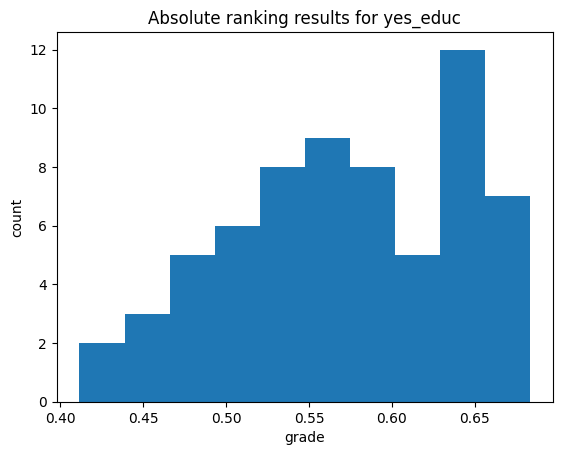

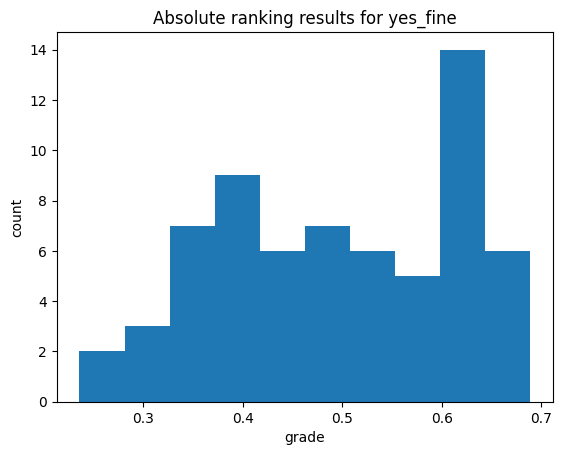

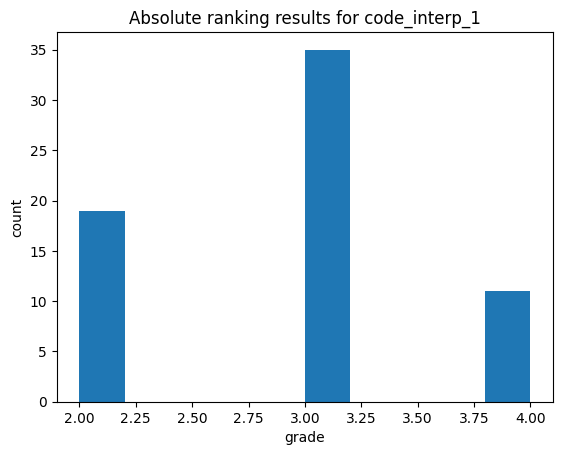

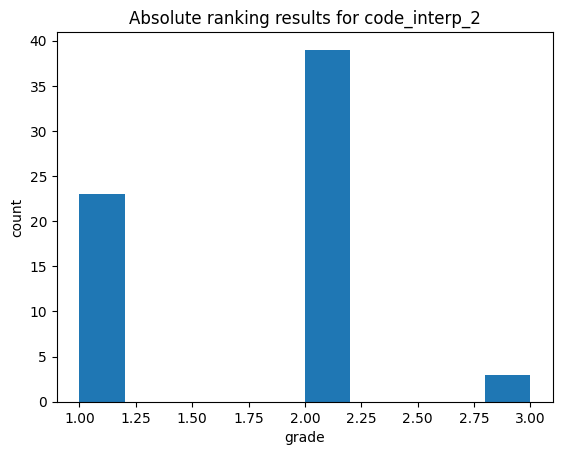

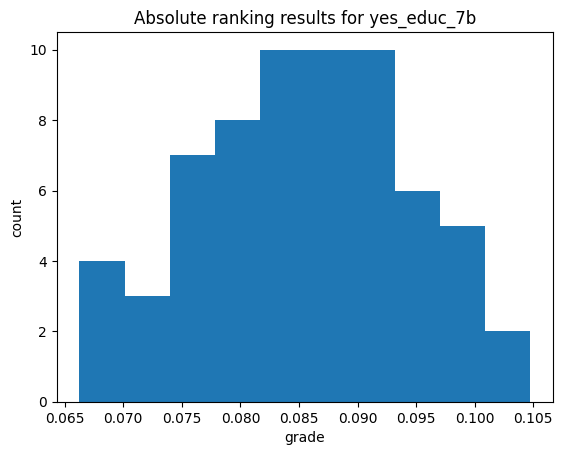

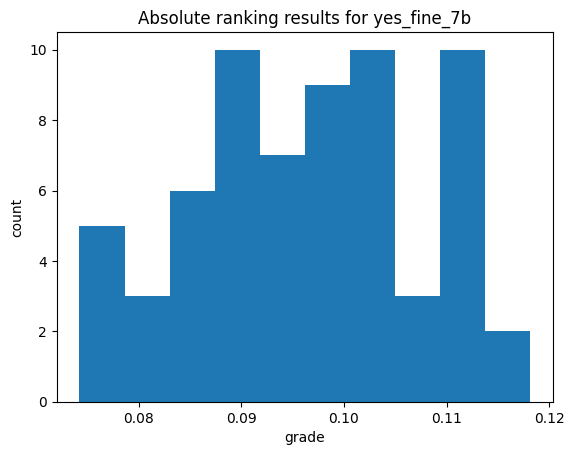

In [38]:
for method_nams,val in  dic_int_res.items():
    plt.hist(list(val.values()),bins=10)
    plt.title('Absolute ranking results for '+method_nams)
    plt.xlabel('grade')
    plt.ylabel('count')
    plt.show()


In [25]:
name_methd = list(dic_int_res.keys())
name_methd

['yes_educ', 'yes_fine', 'code_interp_1', 'code_interp_2']

In [28]:
val

dict_values([0.6834431886672974, 0.6804456114768982, 0.6698958277702332, 0.6632799506187439, 0.6589604020118713, 0.6585617065429688, 0.6575585603713989, 0.6524792313575745, 0.6518361568450928, 0.6499946117401123, 0.6478952169418335, 0.6402730941772461, 0.6399556398391724, 0.6385430693626404, 0.6367807984352112, 0.6359875202178955, 0.6359875202178955, 0.6344931125640869, 0.6335908770561218, 0.6254096031188965, 0.6252623796463013, 0.6171950697898865, 0.6150386929512024, 0.6107367277145386, 0.5999165773391724, 0.5970262289047241, 0.5920254588127136, 0.5891841053962708, 0.5883628129959106, 0.5870406031608582, 0.5859176516532898, 0.5853719115257263, 0.5721364617347717, 0.5710912346839905, 0.5694190859794617, 0.5649372339248657, 0.5578688979148865, 0.5577664375305176, 0.55216383934021, 0.5508038997650146, 0.5481326580047607, 0.5406754612922668, 0.5405508875846863, 0.5399813652038574, 0.5384300947189331, 0.5315517783164978, 0.5294356346130371, 0.5273014307022095, 0.5237019062042236, 0.5197119

In [33]:
methods_name = list(dic_int_res.keys())
methods_name

['yes_educ', 'yes_fine', 'code_interp_1', 'code_interp_2']

In [31]:
# yes educ
idx_method = 0
show_top_k=10
methods_name = list(dic_int_res.keys())
method_name = methods_name[idx_method]
val = dic_int_res[method_name]
print("==================================== top k puzzles for "+method_name+" ==============================")
sort_v=sorted(val,key=val.get)
for i in sort_v[:show_top_k]:
    print("================== lowest grade puzzle ========================\n")
    print(i,": grade = ", val[i],"\n")
    print(puzzle_dict[i])
for i in sort_v[-show_top_k:]:
    print("================== highest grade puzzle ========================\n")
    print(i,": grade = ", val[i])
    print(puzzle_dict[i])

==================================== top k puzzles for yes_educ ==============================
================== lowest grade puzzle ========================

puzz_627 : grade =  0.4115510582923889 

The puzzle involves defining two functions in Python. The first function f(subsequence: List[int]) checks if a given list of integers is in strictly increasing order. The second function g(arr=[3, 2, 6, 4, 5, 1]) finds the longest increasing subsequence in a given list of integers.
```python

from typing import List

def f(subsequence: List[int]) -> bool:
    return all(subsequence[i] < subsequence[i + 1] for i in range(len(subsequence) - 1))

def g(arr=[3, 2, 6, 4, 5, 1]):
    n = len(arr)
    dp = [1] * n
    for i in range(1, n):
        for j in range(i):
            if arr[i] > arr[j]:
                dp[i] = max(dp[i], dp[j] + 1)
    max_len = max(dp)
    start_index = dp.index(max_len)
    subsequence = [arr[start_index]]
    for i in range(start_index - 1, -1, -1):
        if arr[

In [32]:
# yes_fine
idx_method = 1
show_top_k=10
methods_name = list(dic_int_res.keys())
method_name = methods_name[idx_method]
val = dic_int_res[method_name]
print("==================================== top k puzzles for "+method_name+" ==============================")
sort_v=sorted(val,key=val.get)
for i in sort_v[:show_top_k]:
    print("================== lowest grade puzzle ========================\n")
    print(i,": grade = ", val[i],"\n")
    print(puzzle_dict[i])
for i in sort_v[-show_top_k:]:
    print("================== highest grade puzzle ========================\n")
    print(i,": grade = ", val[i])
    print(puzzle_dict[i])

==================================== top k puzzles for yes_fine ==============================
================== lowest grade puzzle ========================

puzz_627 : grade =  0.23592011630535126 

The puzzle involves defining two functions in Python. The first function f(subsequence: List[int]) checks if a given list of integers is in strictly increasing order. The second function g(arr=[3, 2, 6, 4, 5, 1]) finds the longest increasing subsequence in a given list of integers.
```python

from typing import List

def f(subsequence: List[int]) -> bool:
    return all(subsequence[i] < subsequence[i + 1] for i in range(len(subsequence) - 1))

def g(arr=[3, 2, 6, 4, 5, 1]):
    n = len(arr)
    dp = [1] * n
    for i in range(1, n):
        for j in range(i):
            if arr[i] > arr[j]:
                dp[i] = max(dp[i], dp[j] + 1)
    max_len = max(dp)
    start_index = dp.index(max_len)
    subsequence = [arr[start_index]]
    for i in range(start_index - 1, -1, -1):
        if arr

In [34]:
#code_interp_1'
idx_method = 2
show_top_k=10
methods_name = list(dic_int_res.keys())
method_name = methods_name[idx_method]
val = dic_int_res[method_name]
print("==================================== top k puzzles for "+method_name+" ==============================")
sort_v=sorted(val,key=val.get)
for i in sort_v[:show_top_k]:
    print("================== lowest grade puzzle ========================\n")
    print(i,": grade = ", val[i],"\n")
    print(puzzle_dict[i])
for i in sort_v[-show_top_k:]:
    print("================== highest grade puzzle ========================\n")
    print(i,": grade = ", val[i])
    print(puzzle_dict[i])

==================================== top k puzzles for code_interp_1 ==============================
================== lowest grade puzzle ========================

puzz_299 : grade =  2 

The puzzle checks if a given string is a palindrome or not.
```python

def f(s: str) -> bool:
    return s == s[::-1]

def g() -> str:
    return "radar"

assert f(g()) == True

```
================== lowest grade puzzle ========================

puzz_919 : grade =  2 

The puzzle checks if a given string is a palindrome or not.
```python

def f(s: str) -> bool:
    return s == s[::-1]

def g():
    return "radar"

assert f(g()) == True

```
================== lowest grade puzzle ========================

puzz_906 : grade =  2 

The puzzle checks if a given string is a palindrome or not.
```python

def f(s: str) -> bool:
    return s == s[::-1]

def g():
    return "radar"

assert f(g()) == True

```
================== lowest grade puzzle ========================

puzz_330 : grade =  2 

The puzzle i

In [35]:
#code_interp_2
idx_method = 3
show_top_k=10
methods_name = list(dic_int_res.keys())
method_name = methods_name[idx_method]
val = dic_int_res[method_name]
print("==================================== top k puzzles for "+method_name+" ==============================")
sort_v=sorted(val,key=val.get)
for i in sort_v[:show_top_k]:
    print("================== lowest grade puzzle ========================\n")
    print(i,": grade = ", val[i],"\n")
    print(puzzle_dict[i])
for i in sort_v[-show_top_k:]:
    print("================== highest grade puzzle ========================\n")
    print(i,": grade = ", val[i])
    print(puzzle_dict[i])

==================================== top k puzzles for code_interp_2 ==============================
================== lowest grade puzzle ========================

puzz_811 : grade =  1 

The puzzle involves defining a function f that checks if the factorial of a given number matches a given result, and a function g that calculates the factorial of a given number. The assert statement checks if f(g()) returns True.
```python

def f(result: int, number=5) -> bool:
    factorial = 1
    for i in range(1, number + 1):
        factorial *= i
    return factorial == result

def g(number=5):
    factorial = 1
    for i in range(1, number + 1):
        factorial *= i
    return factorial

assert f(g()) == True

```
================== lowest grade puzzle ========================

puzz_141 : grade =  1 

The puzzle involves defining a function f that checks if the factorial of a given number matches a provided result, and a function g that calculates the factorial of a number recursively. The 

In [39]:
#yes7b
idx_method = 4
show_top_k=10
methods_name = list(dic_int_res.keys())
method_name = methods_name[idx_method]
val = dic_int_res[method_name]
print("==================================== top k puzzles for "+method_name+" ==============================")
sort_v=sorted(val,key=val.get)
for i in sort_v[:show_top_k]:
    print("================== lowest grade puzzle ========================\n")
    print(i,": grade = ", val[i],"\n")
    print(puzzle_dict[i])
for i in sort_v[-show_top_k:]:
    print("================== highest grade puzzle ========================\n")
    print(i,": grade = ", val[i])
    print(puzzle_dict[i])

==================================== top k puzzles for yes_educ_7b ==============================
================== lowest grade puzzle ========================

puzz_240 : grade =  0.06625968217849731 

The puzzle requires finding a specific sequence of numbers in a matrix and returning True if the sequence is found in any row of the matrix.
```python

from typing import List

def f(matrix: List[List[int]]) -> bool:
    target_sequence = [1, 2, 3, 4]  # Sequence to find in the matrix
    
    def find_sequence_in_row(row):
        for i in range(len(row) - len(target_sequence) + 1):
            if row[i:i+len(target_sequence)] == target_sequence:
                return True
        return False

    for row in matrix:
        if find_sequence_in_row(row):
            return True
    return False

def g(matrix=[[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 1, 2, 3],
             [4, 5, 6, 7, 8]]):
    return matrix

assert f(g()) == True

```
==================

In [ ]:
#yes7b
idx_method = 5
show_top_k=10
methods_name = list(dic_int_res.keys())
method_name = methods_name[idx_method]
val = dic_int_res[method_name]
print("==================================== top k puzzles for "+method_name+" ==============================")
sort_v=sorted(val,key=val.get)
for i in sort_v[:show_top_k]:
    print("================== lowest grade puzzle ========================\n")
    print(i,": grade = ", val[i],"\n")
    print(puzzle_dict[i])
for i in sort_v[-show_top_k:]:
    print("================== highest grade puzzle ========================\n")
    print(i,": grade = ", val[i])
    print(puzzle_dict[i])

# test with chatgpt

In [2]:
from openai import OpenAI
from utils_test_puzzle import get_completion
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from key import OPENAI_API_KEY

cfg: dict = {
"temperature": 0.,
# "top_p": 1.,
# TODO: rename config option?
"model": "gpt-3.5-turbo-0125",
"logprobs": True,
"top_logprobs": 5,
"max_tokens": 200,
}
max_retries=10
timeout=30
client = OpenAI(api_key=OPENAI_API_KEY,max_retries=max_retries, timeout=timeout)


## data

In [ ]:
puz_list=[#n_correct 1 /5
"""
Puzzle description: The puzzle requires the student to define a function that generates a list of numbers based on given parameters, and then check if the generated list satisfies certain conditions.
from typing import List 
def f(x: List[int], a=43536, s=3795, e=417606) -> bool:
    return x[0] == a and x[-1] <= e and (x[-1] + s > e) and all([x[i] + s == x[i + 1] for i in range(len(x) - 1)])
def g(a = 43536, s = 3795, e = 417606):
    return list(range(a, e + 1, s))
assert f(g()) == True
""",
#n_correct 3 /5

"""
The puzzle involves finding a missing number in a list of integers by calculating the sum of the list and comparing it to the expected sum of a sequence of numbers.

from typing import List

def f(missing_num: int, nums=[1, 2, 3, 4, 6, 7, 8, 9]) -> bool:
    n = len(nums) + 1
    total_sum = n * (n + 1) // 2
    return missing_num == total_sum - sum(nums)

def g(nums=[1, 2, 3, 4, 6, 7, 8, 9]) -> int:
    n = len(nums) + 1
    total_sum = n * (n + 1) // 2
    return total_sum - sum(nums)

assert f(g()) == True
""",
#difficulty 3 /5

"""
The puzzle requires the student to create a string expression using only the characters '1', '8', '-', '+', '*', and '/' that evaluates to 63 and contains three occurrences of the digit '8' and one occurrence of the digit '1'.
def f(s: str) -> bool:
    return set(s) <= set('18-+*/') and s.count('8') == 3 and (s.count('1') == 1) and (eval(s) == 63)
def g():
    return "8*8-1**8"
assert f(g()) == True
"""
          
          ]

## Test OpenCodeInterpreter

4

# other stuff

In [5]:
base_persona ="You are a Professor teaching a programming course in Python. "
base_persona += "You want to give some Python Programming Puzzles to your master's student in CS to improve their level in Python. " # student -> Master student
prompt_instruction = base_persona 
prompt_instruction += """Python Programming Puzzles (P3) consists of two functions: a problem function `f` and its corresponding solution `g`. The challenge lies in solving a challenging SAT problem `f` with a function `g` such that `f(g())` evaluates to `True`.

Rules:
- f and g should be distinct (the solution `g` should not be a copy-paste of `f`)
- Make sure the problem is challenging enough for master's students in CS

```python
def f(solution, args=...) -> bool:
    # Python code to test the solution returned by g.
    # This function is a test unit and must return True if the solution is correct, False otherwise.

def g(args=...) -> solution:
    # Python code to generate a solution for the problem.
    # The solution should generalize to all possible args.
    return solution

assert f(g()) == True
```
Your Task:
Create a new Python Programming Puzzle that is challenging and educational for master's students in CS."""

In [7]:
my_eval="""Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response (Problem and Solution).

INSTRUCTION:
{instruction}

RESPONSE:
{response}
"""
"""
Not educational, Somewhat Educational, Highly Educational"""

'\nNot educational, Somewhat Educational, Highly Educational'

In [3]:
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from openai import OpenAI
from key import OPENAI_API_KEY
from utils_test_puzzle import get_completion
cfg: dict = {
"temperature": 0.,
# "top_p": 1.,
# TODO: rename config option?
"model": "gpt-3.5-turbo-0125",
"logprobs": True,
"top_logprobs": 5,
"max_tokens": 200,
}
max_retries=10
timeout=30
client = OpenAI(api_key=OPENAI_API_KEY,max_retries=max_retries, timeout=timeout)


In [10]:
orig_instruction=prompt_instruction
orig_response= puz_list[2]
Criteria = prometheus_2
prompt = instruction_prometheus.format(orig_instruction=orig_instruction,orig_response=orig_response,Criteria=Criteria)
# print(prompt)

In [11]:
from utils_test_puzzle import puzzle_dict

In [12]:
name_puz,puzzle = list(puzzle_dict.items())[0]
puzzle_format = puzzle.replace("```python","").replace("```","")
puzzle_format = "Problem:" + puzzle_format.split("def g")[0]+ "Solution: \n" + "def g"+puzzle_format.split("def g")[1]
print(name_puz, puzzle_format)

bad_puzzles:0 Problem:
def f(is_sorted: bool, arr: List[int]) -> bool:
    return is_sorted == all((arr[i] <= arr[i + 1] for i in range(len(arr) - 1)))

Solution: 
def g(arr: List[int]) -> bool:
    return all((arr[i] <= arr[i + 1] for i in range(len(arr) - 1)))



In [132]:
# prompt = airoboros.format(instruction=prompt_instruction, response=puzzle_format,threshold=90)
prompt = my_eval.format(instruction=instruction,response=puzzle_format)

out=get_completion(client,prompt, cfg,temperature=0.)
print(out)


Based on the given problem and solution, I would rate this as "Somewhat complex" for a master's student in Computer Science. The problem involves checking if an array is sorted, which requires understanding of list comprehension and boolean logic. The solution provided requires knowledge of iterating over arrays and using list comprehension to check for sorting. It is not overly complex but still requires a good understanding of Python programming concepts.


In [42]:
from pairrm import RankingSimilarity


S = [1, 2, 3,4,5,6,7,8,9,10]

T = [1, 2, 3,5,4,6,7,8,10,11]

RankingSimilarity(S, T).rbo(p=0.9)


0.6244393860099999